# Lab Work 10 (Student version): graph models

We can use the following libraries.

# Isaac Balam Rodriguez Arellano

# Collen Ellis

In [50]:
import matplotlib.pyplot as plt
import math
import sys
import random
import time
import networkx as nx #used this library to create graphs as its more resoruce efficient when processing (albeit less memeory efficent) so hopefully future problems wont take forever liek last lab
print(sys.version)

3.14.0 (main, Nov 19 2025, 22:43:52) [MSC v.1944 64 bit (AMD64)]


## Exercise 1: Preliminary work

### Question 1

Download the three following graphs on Moodle:
- IP-inet-undir.txt (small map of the internet at the IP level obtained with traceroute measurements, source not communicated)
- AS-Caida-undir.txt (snapshot map of the internet at the AS level in 2007 obtained using BGP tables, part of project CAIDA)

Both are undirected graphs. They will be used during the rest of this practical work. 

Apply the codes seen in the previous labs to:
- count their number of nodes and links, 
- plot their degree distribution,
- compute their number of triangles,
- give a (lower-bound) approximation of the diameter (of their largest connected component).

In [51]:
# Load graphs
try:
    G_inet = nx.read_edgelist('IP-inet-undir.txt', nodetype=int)
    G_caida = nx.read_edgelist('AS-Caida-undir.txt', nodetype=int)
except FileNotFoundError:
    print("Files not found. Please ensure they are in the same directory.")

print("--- IP-inet Graph ---")
print(f"Nodes: {G_inet.number_of_nodes()}")
print(f"Edges: {G_inet.number_of_edges()}")

print("\n--- AS-Caida Graph ---")
print(f"Nodes: {G_caida.number_of_nodes()}")
print(f"Edges: {G_caida.number_of_edges()}")

--- IP-inet Graph ---
Nodes: 9740
Edges: 35567

--- AS-Caida Graph ---
Nodes: 26475
Edges: 53381


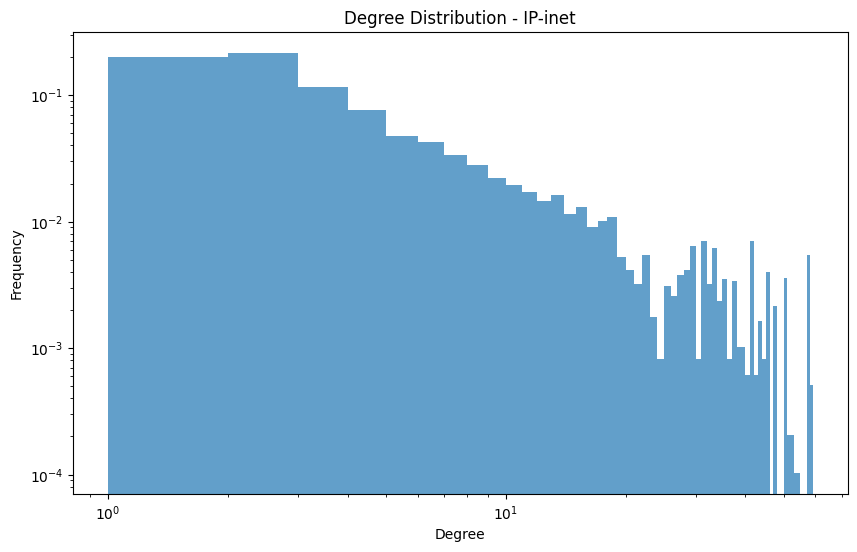

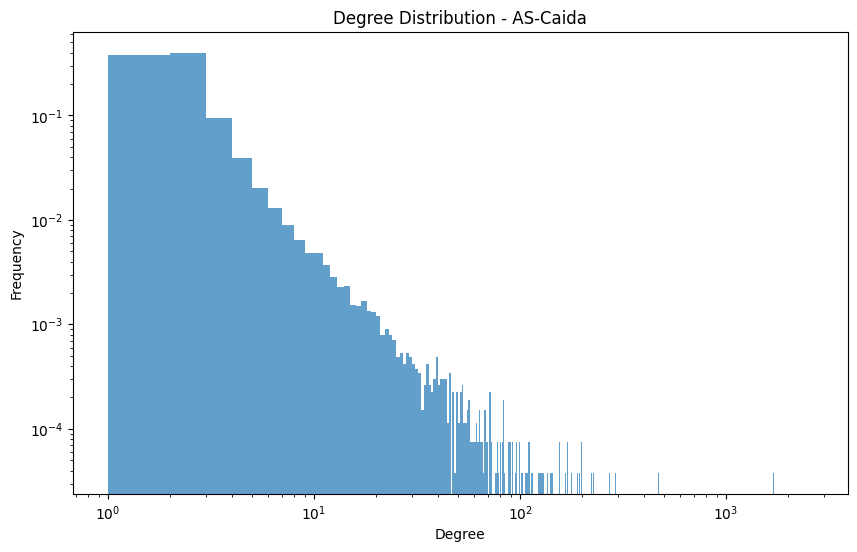

In [34]:
def plot_degree_distribution(G, name):
    degrees = [d for n, d in G.degree()]
    plt.figure(figsize=(10, 6))
    plt.hist(degrees, bins=range(min(degrees), max(degrees) + 2, 1), density=True, alpha=0.7)
    plt.title(f"Degree Distribution - {name}")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.yscale('log')
    plt.xscale('log')
    plt.show()

plot_degree_distribution(G_inet, "IP-inet")
plot_degree_distribution(G_caida, "AS-Caida")

In [35]:
def analyze_triangles(G, name):
    print(f"\nAnalyzing Triangles for {name}...")
    
    # Triangles
    triangles = sum(nx.triangles(G).values()) // 3
    print(f"Number of triangles: {triangles}")

analyze_triangles(G_inet, "IP-inet")
analyze_triangles(G_caida, "AS-Caida")


Analyzing Triangles for IP-inet...
Number of triangles: 206909

Analyzing Triangles for AS-Caida...
Number of triangles: 36365


In [36]:
def analyze_diameter(G, name):
    print(f"\nAnalyzing Diameter for {name}...")
    
    # Diameter estimation (Largest Connected Component)
    if nx.is_connected(G):
        G_cc = G
    else:
        largest_cc = max(nx.connected_components(G), key=len)
        G_cc = G.subgraph(largest_cc)
        print(f"(Graph not connected, using Largest CC of size {len(largest_cc)})")
    
    # Lower bound diameter approximation
    diameter = nx.approximation.diameter(G_cc)
    print(f"Approximate Diameter: {diameter}")

analyze_diameter(G_inet, "IP-inet")
analyze_diameter(G_caida, "AS-Caida")


Analyzing Diameter for IP-inet...
(Graph not connected, using Largest CC of size 8557)
Approximate Diameter: 34

Analyzing Diameter for AS-Caida...
Approximate Diameter: 17


## Exercise 2: Erdös-Rényi model

### Question 2

Create an Erdös-Rényi graph with the same number of nodes and links as the CAIDA graph. Do the same for the INET graph.

In [37]:
# Generate Erdös-Rényi graphs
# The Erdös–Rényi graphs are generated with the same number of nodes and the same expected number of edges as the real networks.
def generate_er_graph(original_G, name):
    n = original_G.number_of_nodes()
    m = original_G.number_of_edges()
    # Expected edges m = p * n*(n-1)/2  =>  p = 2m / (n*(n-1))
    p = (2 * m) / (n * (n - 1))
    
    print(f"Generating Erdös-Rényi graph for {name}...")
    print(f"Target: n={n}, m={m} -> p={p:.4e}")
    
    # Generate
    G_er = nx.erdos_renyi_graph(n, p, seed=42)
    
    print(f"Generated: Nodes={G_er.number_of_nodes()}, Edges={G_er.number_of_edges()}")
    return G_er

print("\n--- Generating Models ---")
G_inet_er = generate_er_graph(G_inet, "IP-inet")
G_caida_er = generate_er_graph(G_caida, "AS-Caida")


--- Generating Models ---
Generating Erdös-Rényi graph for IP-inet...
Target: n=9740, m=35567 -> p=7.4990e-04
Generated: Nodes=9740, Edges=35302
Generating Erdös-Rényi graph for AS-Caida...
Target: n=26475, m=53381 -> p=1.5232e-04
Generated: Nodes=26475, Edges=53285


### Question 3

For both graphs, compare the degree distribution, the number of triangles, the approximate diameter (of the largest component) of the model to the ones of the original graph.

You are expected:
- to compare the values (or shapes for the degree distributions)
- and to evaluate in what ways the model resembles the original graph, is it consistent with the lecture?

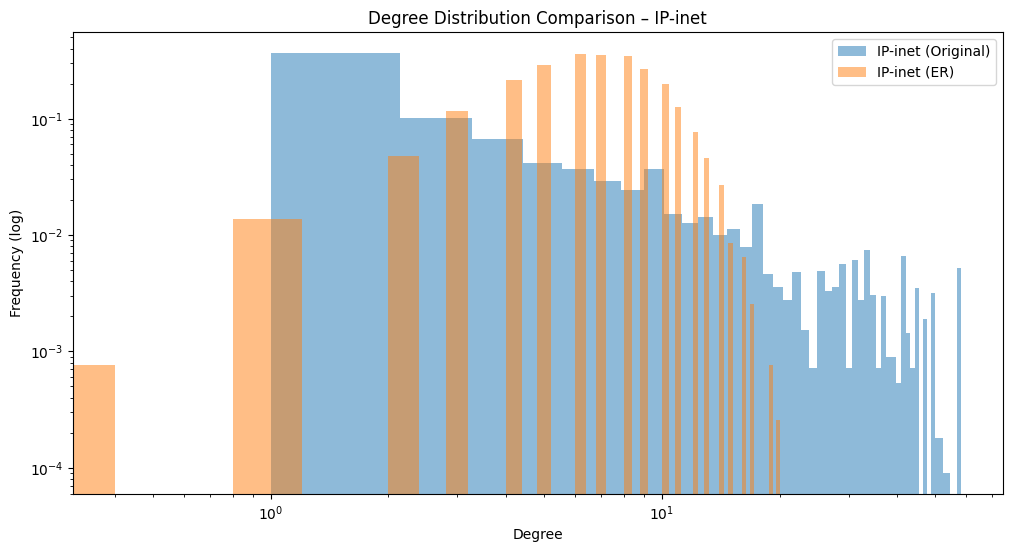

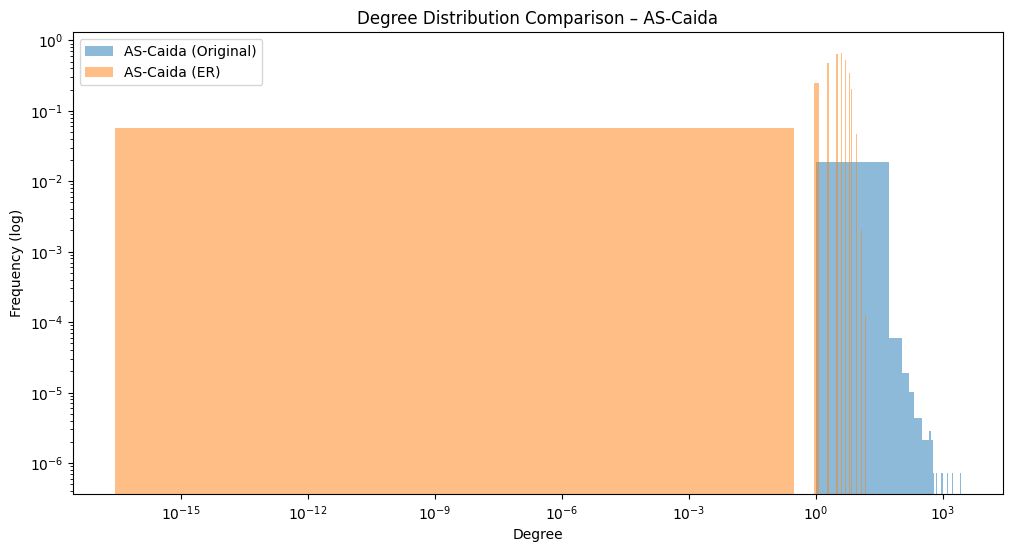

In [38]:
def compare_degree_distribution(G1, G2, label1, label2, title):
    deg1 = [d for _, d in G1.degree()]
    deg2 = [d for _, d in G2.degree()]
    
    plt.figure(figsize=(12, 6))
    
    plt.hist(deg1, bins=50, density=True, alpha=0.5, label=label1, log=True)
    plt.hist(deg2, bins=50, density=True, alpha=0.5, label=label2, log=True)
    
    plt.title(title)
    plt.xlabel("Degree")
    plt.ylabel("Frequency (log)")
    plt.xscale('log')
    plt.legend()
    plt.show()


compare_degree_distribution(
    G_inet,
    G_inet_er,
    "IP-inet (Original)",
    "IP-inet (ER)",
    "Degree Distribution Comparison – IP-inet"
)

compare_degree_distribution(
    G_caida,
    G_caida_er,
    "AS-Caida (Original)",
    "AS-Caida (ER)",
    "Degree Distribution Comparison – AS-Caida"
)
#The ER model completely fails to reproduce the heavy-tailed structure of the AS graph by the way youll see this when you run the code

In [39]:
def compare_triangles(G1, G2, label1, label2, title):
    print(f"\n--- Triangle Comparison: {title} ---")
    
    t1 = sum(nx.triangles(G1).values()) // 3
    t2 = sum(nx.triangles(G2).values()) // 3
    
    print(f"{label1}: {t1}")
    print(f"{label2}: {t2}")
    
    if t1 > 0:
        print(f"Ratio ({label2}/{label1}): {t2/t1:.4e}")
    else:
        print(f"{label1} has 0 triangles")

compare_triangles(
    G_inet,
    G_inet_er,
    "IP-inet (Original)",
    "IP-inet (ER)",
    "IP-inet"
)

compare_triangles(
    G_caida,
    G_caida_er,
    "AS-Caida (Original)",
    "AS-Caida (ER)",
    "AS-Caida"
)



--- Triangle Comparison: IP-inet ---
IP-inet (Original): 206909
IP-inet (ER): 72
Ratio (IP-inet (ER)/IP-inet (Original)): 3.4798e-04

--- Triangle Comparison: AS-Caida ---
AS-Caida (Original): 36365
AS-Caida (ER): 12
Ratio (AS-Caida (ER)/AS-Caida (Original)): 3.2999e-04


In [40]:
def compare_diameter(G1, G2, label1, label2, title):
    print(f"\n--- Diameter Comparison: {title} ---")
    
    def approx_diam(G):
        if nx.is_connected(G):
            H = G
        else:
            cc = max(nx.connected_components(G), key=len)
            H = G.subgraph(cc)
        return nx.approximation.diameter(H)

    d1 = approx_diam(G1)
    d2 = approx_diam(G2)

    print(f"{label1}: {d1}")
    print(f"{label2}: {d2}")

compare_diameter(
    G_inet,
    G_inet_er,
    "IP-inet (Original)",
    "IP-inet (ER)",
    "IP-inet"
)

compare_diameter(
    G_caida,
    G_caida_er,
    "AS-Caida (Original)",
    "AS-Caida (ER)",
    "AS-Caida"
)



--- Diameter Comparison: IP-inet ---
IP-inet (Original): 34
IP-inet (ER): 9

--- Diameter Comparison: AS-Caida ---
AS-Caida (Original): 17
AS-Caida (ER): 15


## Exercise 3: Barabasi-Albert model


### Question 4

Create a Barabasi-Albert (BA) graph with a number of links and nodes comparable to the CAIDA graph. We remind you that in a BA model with $n$ nodes, the number of links $m$ is (approximately) equal to $\alpha n$ where $ \alpha $ is the parameter of the model (see the algorithm in the lecture). 

Same question for the INET graph.

In [41]:
# Generate Barabasi-Albert graphs
def generate_ba_graph(original_G, name):
    n = original_G.number_of_nodes()
    m_total = original_G.number_of_edges()
    
    # Calculate alpha
    alpha = max(1, m_total // n)
    if alpha < 1: alpha = 1
    
    print(f"Generating Barabasi-Albert graph for {name}...")
    print(f"Target: n={n}, m_total={m_total} -> Use alpha={alpha} (edges/new node)")
    
    G_ba = nx.barabasi_albert_graph(n, alpha, seed=42)
    print(f"Generated: Nodes={G_ba.number_of_nodes()}, Edges={G_ba.number_of_edges()}")
    return G_ba

G_inet_ba = generate_ba_graph(G_inet, "IP-inet")
G_caida_ba = generate_ba_graph(G_caida, "AS-Caida")
#Due to the construction of the Barabási–Albert model, the total number of edges only approximately matches that of the original graph

Generating Barabasi-Albert graph for IP-inet...
Target: n=9740, m_total=35567 -> Use alpha=3 (edges/new node)
Generated: Nodes=9740, Edges=29211
Generating Barabasi-Albert graph for AS-Caida...
Target: n=26475, m_total=53381 -> Use alpha=2 (edges/new node)
Generated: Nodes=26475, Edges=52946


### Question 5

For both graphs, compare the degree distribution, the number of triangles, the approximate diameter (of the largest component) of the model to the ones of the original graph.

You are expected:
- to compare the values (or shapes for the degree distributions)
- and to evaluate in what ways the model resembles the original graph, is it consistent with the lecture?

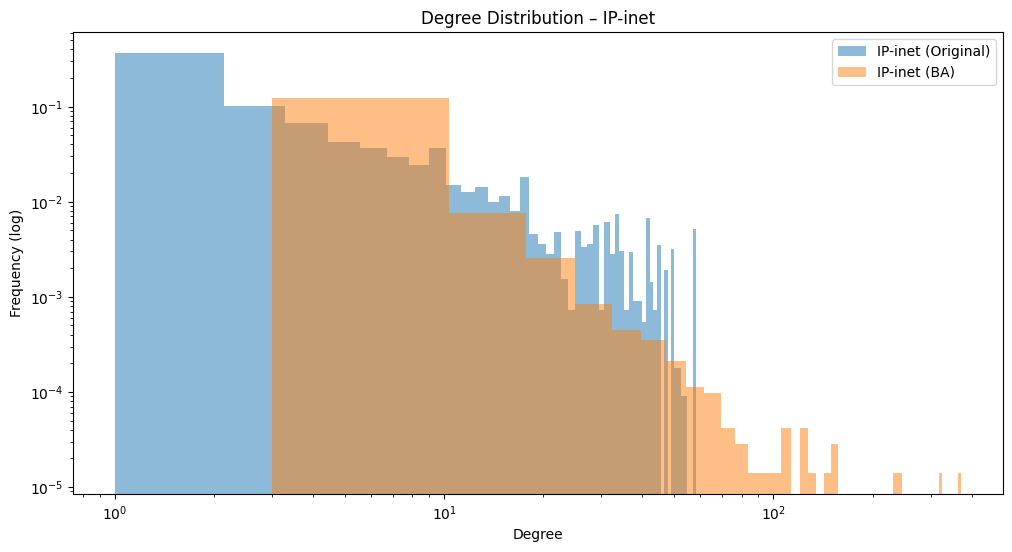

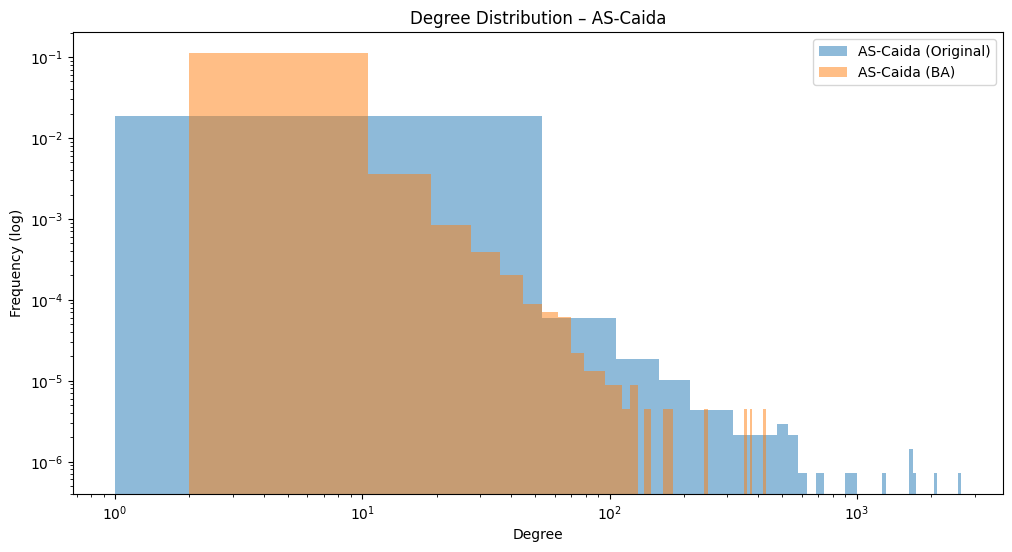

In [42]:
# 1. Compare Degree Distributions
compare_degree_distribution(
    G_inet,
    G_inet_ba,
    "IP-inet (Original)",
    "IP-inet (BA)",
    "Degree Distribution – IP-inet"
)

compare_degree_distribution(
    G_caida,
    G_caida_ba,
    "AS-Caida (Original)",
    "AS-Caida (BA)",
    "Degree Distribution – AS-Caida"
)


In [43]:
# 2. Compare Triangles
compare_triangles(
    G_inet,
    G_inet_ba,
    "IP-inet (Original)",
    "IP-inet (BA)",
    "IP-inet"
)

compare_triangles(
    G_caida,
    G_caida_ba,
    "AS-Caida (Original)",
    "AS-Caida (BA)",
    "AS-Caida"
)



--- Triangle Comparison: IP-inet ---
IP-inet (Original): 206909
IP-inet (BA): 536
Ratio (IP-inet (BA)/IP-inet (Original)): 2.5905e-03

--- Triangle Comparison: AS-Caida ---
AS-Caida (Original): 36365
AS-Caida (BA): 191
Ratio (AS-Caida (BA)/AS-Caida (Original)): 5.2523e-03


In [44]:
# 3. Compare Diameter (LCC)
compare_diameter(
    G_inet,
    G_inet_ba,
    "IP-inet (Original)",
    "IP-inet (BA)",
    "IP-inet"
)

compare_diameter(
    G_caida,
    G_caida_ba,
    "AS-Caida (Original)",
    "AS-Caida (BA)",
    "AS-Caida"
)



--- Diameter Comparison: IP-inet ---
IP-inet (Original): 34
IP-inet (BA): 7

--- Diameter Comparison: AS-Caida ---
AS-Caida (Original): 17
AS-Caida (BA): 9


Degree distribution

For both the IP-level and AS-level graphs, the Barabási–Albert (BA) model reproduces the heavy-tailed degree distribution observed in the original networks. Unlike the Erdös–Rényi model, the BA graphs exhibit the presence of hubs and a broad range of node degrees, which is consistent with preferential attachment as described in the lecture. This makes the BA model a significantly better approximation of the Internet topology in terms of degree heterogeneity.

However, the degree distributions of the BA graphs remain smoother and more idealized than those of the real networks. In particular, the original graphs exhibit deviations from a pure power-law behavior due to structural constraints, measurement artifacts, and engineering limitations that are not captured by the BA model.

Triangles and clustering

Despite improving the degree distribution, the BA model severely underestimates the number of triangles compared to the original graphs. While BA graphs contain more triangles than Erdös–Rényi graphs, their clustering remains much lower than that observed in the real Internet networks. This highlights the absence of an explicit clustering mechanism in the BA model.

This observation is consistent with the lecture, which emphasizes that preferential attachment alone is insufficient to reproduce the strong local connectivity and clustering present in real-world networks.

Diameter (largest connected component)

The approximate diameter of the BA graphs is closer to that of the original graphs than that of the Erdös–Rényi models. The presence of hubs in the BA model significantly reduces path lengths, leading to a small-world structure. This behavior matches the qualitative properties discussed in the lecture and reflects the role of highly connected nodes in shortening communication paths in large networks.

Nevertheless, differences remain between the BA and original graphs, as real Internet topologies include hierarchical organization and constraints that influence routing paths and network diameter beyond what the BA model captures.

Overall evaluation

Overall, the Barabási–Albert model constitutes a clear improvement over the Erdös–Rényi model in reproducing the structural properties of the Internet graphs, particularly with respect to degree distribution and diameter. However, it fails to capture the high level of clustering and the full structural complexity of real Internet networks. These results are fully consistent with the lecture, which presents the BA model as a first-order approximation based on preferential attachment, but not a complete model of real-world network topologies.

## Exercise 4: Watts-Strogatz Small-World model

### Question 6

Create a regular graph with $n$ nodes, where $n$ equals the one of the initial CAIDA graph. We have these constraints:

* all nodes of a regular graph have the same degree $k$ which is a parameter of the model, choose $k$ so that the number  of edges $m$ is as close as possible to the one of the CAIDA graph,

* each node is connected to the nodes with the closest index, for example, if $k=6$, node $i$ will be connected to nodes $ i-1 $, $ i-2 $, $ i-3$ and $ i+1 $, $ i+2 $, $ i+3 $.

Same question for the INET graph.

In [45]:
def generate_regular_graph(original_G, name):
    n = original_G.number_of_nodes()
    m_target = original_G.number_of_edges()
    
    # Compute k ≈ 2m / n and force it to be even
    k = int(2 * m_target / n)
    if k % 2 == 1:
        k -= 1
    if k < 2:
        k = 2

    print(f"Generating regular graph for {name}...")
    print(f"Target: n={n}, m={m_target}")
    print(f"Using k={k} (degree per node)")
    
    # Build ring lattice
    G_reg = nx.Graph()
    G_reg.add_nodes_from(range(n))
    
    half_k = k // 2
    for i in range(n):
        for d in range(1, half_k + 1):
            G_reg.add_edge(i, (i + d) % n)
            G_reg.add_edge(i, (i - d) % n)
    
    print(f"Generated: Nodes={G_reg.number_of_nodes()}, Edges={G_reg.number_of_edges()}")
    return G_reg

G_caida_reg = generate_regular_graph(G_caida, "AS-Caida")
G_inet_reg = generate_regular_graph(G_inet, "IP-inet")


Generating regular graph for AS-Caida...
Target: n=26475, m=53381
Using k=4 (degree per node)
Generated: Nodes=26475, Edges=52950
Generating regular graph for IP-inet...
Target: n=9740, m=35567
Using k=6 (degree per node)
Generated: Nodes=9740, Edges=29220


### Question 7

Starting from the graph created in the previous question, generate Watts-Strogatz models with several values of the parameter $p$: 0.01, 0.1, 0.3.

In [46]:
def generate_ws_graph(original_G, p, name):
    n = original_G.number_of_nodes()
    m_target = original_G.number_of_edges()
    
    # Compute k ≈ 2m / n and force it to be even
    k = int(2 * m_target / n)
    if k % 2 == 1:
        k -= 1
    if k < 2:
        k = 2

    print(f"Generating Watts-Strogatz graph for {name} with p={p}...")
    print(f"Using n={n}, k={k}, p={p}")
    
    G_ws = nx.watts_strogatz_graph(n, k, p, seed=42)
    
    print(f"Generated: Nodes={G_ws.number_of_nodes()}, Edges={G_ws.number_of_edges()}")
    return G_ws

p_values = [0.01, 0.1, 0.3]

G_caida_ws = {}
for p in p_values:
    G_caida_ws[p] = generate_ws_graph(G_caida, p, "AS-Caida")

G_inet_ws = {}
for p in p_values:
    G_inet_ws[p] = generate_ws_graph(G_inet, p, "IP-inet")



Generating Watts-Strogatz graph for AS-Caida with p=0.01...
Using n=26475, k=4, p=0.01
Generated: Nodes=26475, Edges=52950
Generating Watts-Strogatz graph for AS-Caida with p=0.1...
Using n=26475, k=4, p=0.1
Generated: Nodes=26475, Edges=52950
Generating Watts-Strogatz graph for AS-Caida with p=0.3...
Using n=26475, k=4, p=0.3
Generated: Nodes=26475, Edges=52950
Generating Watts-Strogatz graph for IP-inet with p=0.01...
Using n=9740, k=6, p=0.01
Generated: Nodes=9740, Edges=29220
Generating Watts-Strogatz graph for IP-inet with p=0.1...
Using n=9740, k=6, p=0.1
Generated: Nodes=9740, Edges=29220
Generating Watts-Strogatz graph for IP-inet with p=0.3...
Using n=9740, k=6, p=0.3
Generated: Nodes=9740, Edges=29220


### Question 8

For both graphs, compare the degree distribution, the number of triangles, the approximate diameter (of the largest component) of the model to the ones of the original graph.

You are expected:
- to compare the values (or shapes for the degree distributions)
- and to evaluate in what ways the model resembles the original graph, is it consistent with the lecture?

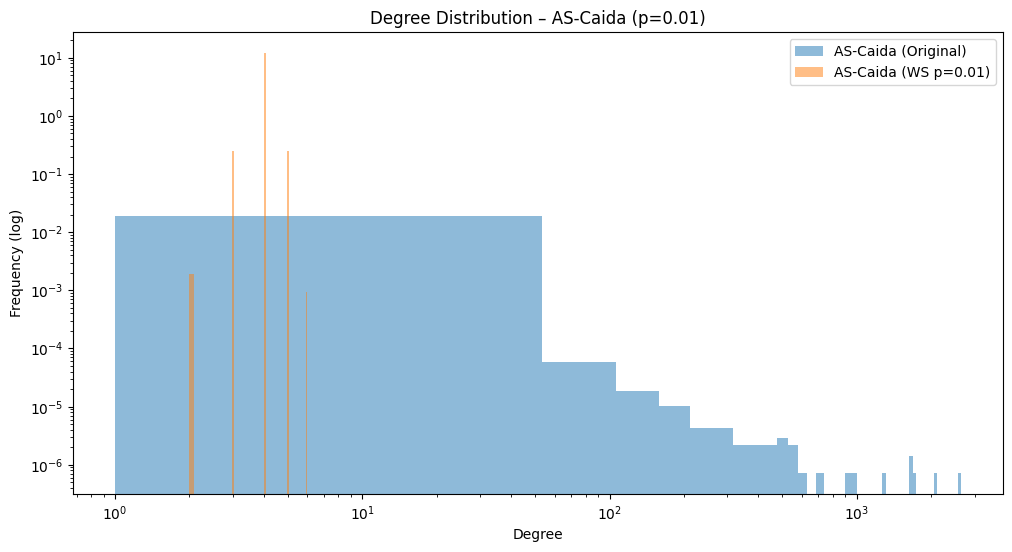

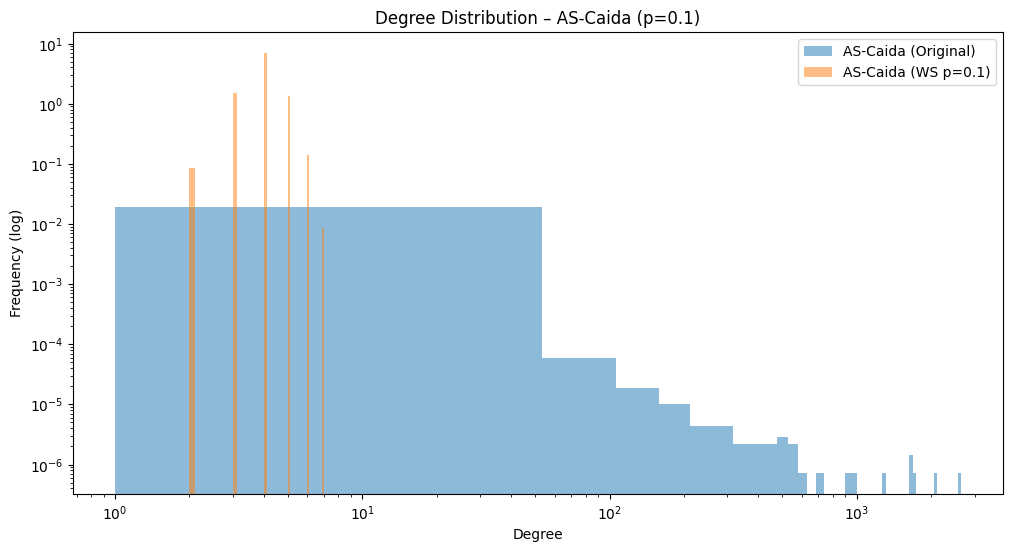

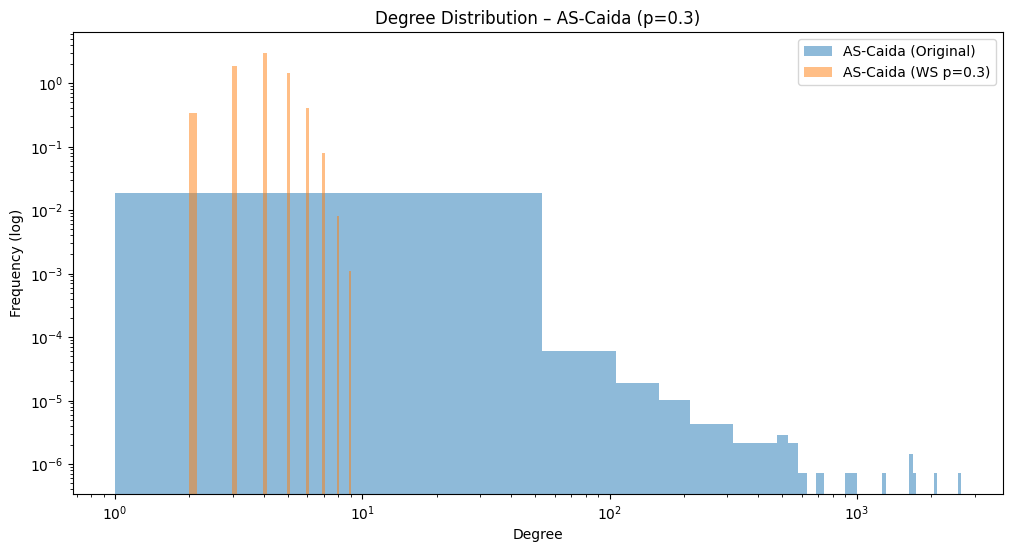

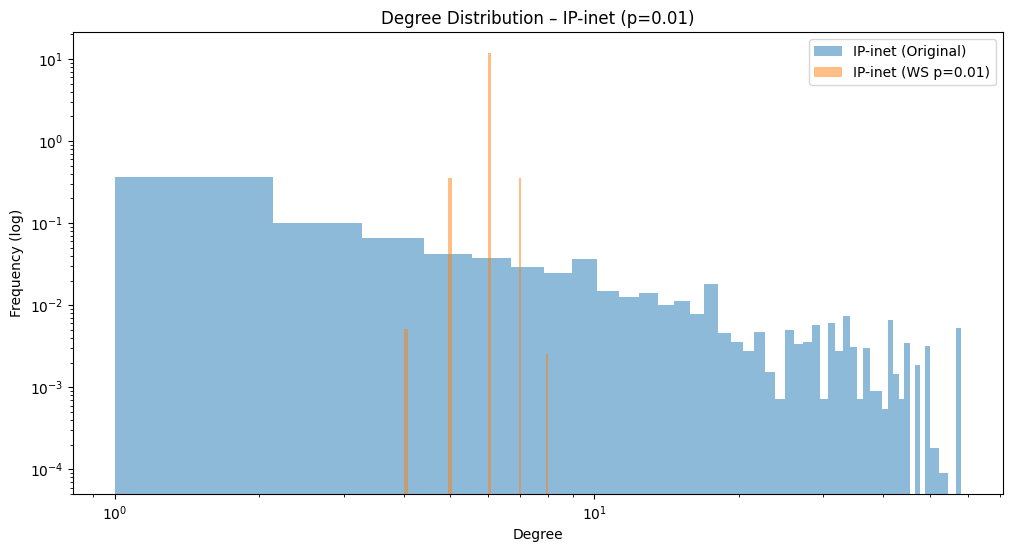

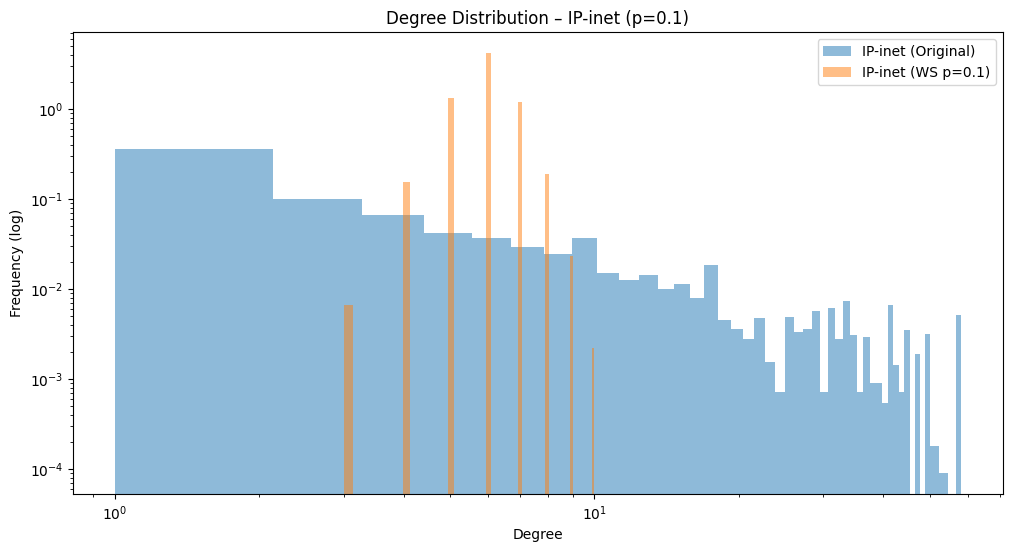

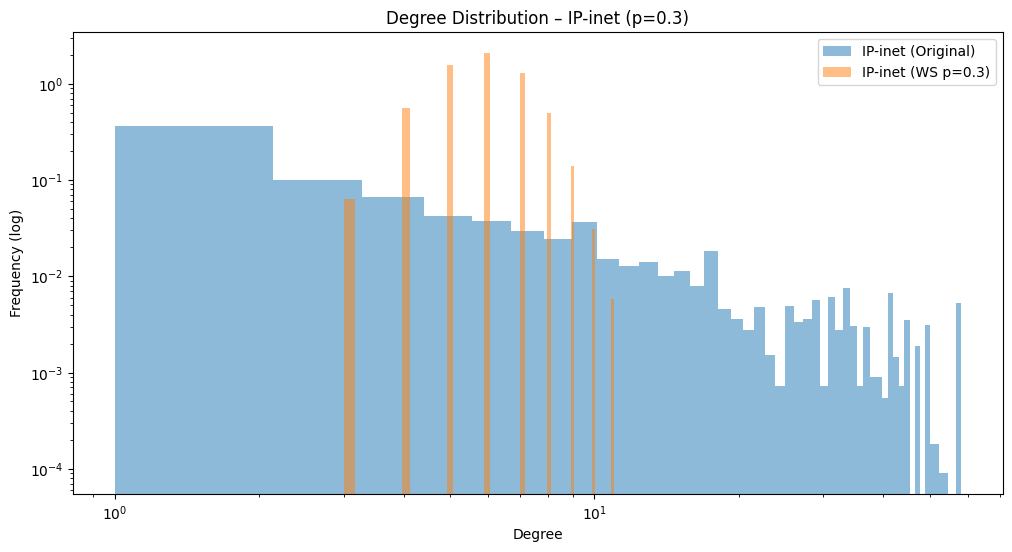

In [47]:
for p, G_ws in G_caida_ws.items():
    compare_degree_distribution(
        G_caida,
        G_ws,
        "AS-Caida (Original)",
        f"AS-Caida (WS p={p})",
        f"Degree Distribution – AS-Caida (p={p})"
    )

for p, G_ws in G_inet_ws.items():
    compare_degree_distribution(
        G_inet,
        G_ws,
        "IP-inet (Original)",
        f"IP-inet (WS p={p})",
        f"Degree Distribution – IP-inet (p={p})"
    )


In [48]:
for p, G_ws in G_caida_ws.items():
    compare_triangles(
        G_caida,
        G_ws,
        "AS-Caida (Original)",
        f"AS-Caida (WS p={p})",
        f"AS-Caida – WS p={p}"
    )

for p, G_ws in G_inet_ws.items():
    compare_triangles(
        G_inet,
        G_ws,
        "IP-inet (Original)",
        f"IP-inet (WS p={p})",
        f"IP-inet – WS p={p}"
    )



--- Triangle Comparison: AS-Caida – WS p=0.01 ---
AS-Caida (Original): 36365
AS-Caida (WS p=0.01): 25682
Ratio (AS-Caida (WS p=0.01)/AS-Caida (Original)): 7.0623e-01

--- Triangle Comparison: AS-Caida – WS p=0.1 ---
AS-Caida (Original): 36365
AS-Caida (WS p=0.1): 19213
Ratio (AS-Caida (WS p=0.1)/AS-Caida (Original)): 5.2834e-01

--- Triangle Comparison: AS-Caida – WS p=0.3 ---
AS-Caida (Original): 36365
AS-Caida (WS p=0.3): 9160
Ratio (AS-Caida (WS p=0.3)/AS-Caida (Original)): 2.5189e-01

--- Triangle Comparison: IP-inet – WS p=0.01 ---
IP-inet (Original): 206909
IP-inet (WS p=0.01): 28362
Ratio (IP-inet (WS p=0.01)/IP-inet (Original)): 1.3707e-01

--- Triangle Comparison: IP-inet – WS p=0.1 ---
IP-inet (Original): 206909
IP-inet (WS p=0.1): 21147
Ratio (IP-inet (WS p=0.1)/IP-inet (Original)): 1.0220e-01

--- Triangle Comparison: IP-inet – WS p=0.3 ---
IP-inet (Original): 206909
IP-inet (WS p=0.3): 9917
Ratio (IP-inet (WS p=0.3)/IP-inet (Original)): 4.7929e-02


In [49]:
for p, G_ws in G_caida_ws.items():
    compare_diameter(
        G_caida,
        G_ws,
        "AS-Caida (Original)",
        f"AS-Caida (WS p={p})",
        f"AS-Caida – WS p={p}"
    )

for p, G_ws in G_inet_ws.items():
    compare_diameter(
        G_inet,
        G_ws,
        "IP-inet (Original)",
        f"IP-inet (WS p={p})",
        f"IP-inet – WS p={p}"
    )



--- Diameter Comparison: AS-Caida – WS p=0.01 ---
AS-Caida (Original): 17
AS-Caida (WS p=0.01): 146

--- Diameter Comparison: AS-Caida – WS p=0.1 ---
AS-Caida (Original): 17
AS-Caida (WS p=0.1): 27

--- Diameter Comparison: AS-Caida – WS p=0.3 ---
AS-Caida (Original): 17
AS-Caida (WS p=0.3): 16

--- Diameter Comparison: IP-inet – WS p=0.01 ---
IP-inet (Original): 34
IP-inet (WS p=0.01): 60

--- Diameter Comparison: IP-inet – WS p=0.1 ---
IP-inet (Original): 34
IP-inet (WS p=0.1): 12

--- Diameter Comparison: IP-inet – WS p=0.3 ---
IP-inet (Original): 34
IP-inet (WS p=0.3): 9
